testing from https://open-meteo.com/en/docs/marine-weather-api

In [2]:
# Cell 1: Install required package (if needed)
!pip install requests matplotlib --quiet


You should consider upgrading via the 'c:\users\chris\desktop\school\24-25\spring\ece 140b\surfwatch\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Cell 2: Import libraries
import requests
import matplotlib.pyplot as plt
import json
from datetime import datetime


In [ ]:
# HOLIDAY API
# switch SchoolHolidays --> PublicHolidays to show all holidays
# # Define the base URL
url = 'https://openholidaysapi.org/SchoolHolidays'

# Set up parameters
params = {
    'countryIsoCode': 'DE',  # ISO 3166-1 alpha-2 country code (e.g., 'DE' for Germany)
    'languageIsoCode': 'en',  # ISO 639-1 language code (e.g., 'en' for English)
    'validFrom': '2025-01-01',
    'validTo': '2025-12-31'
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    holidays = response.json()
    for holiday in holidays:
        print(f"{holiday['startDate']}: {holiday['name']}")
else:
    print(f"Error: {response.status_code}")


2024-12-19: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-20: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2024-12-23: [{'language': 'EN', 'text': 'Christmas Holidays'}]
2025-01-27: [{'language': 'EN', 'text': 'Winter Holiday

In [ ]:
# CURRENT WEATHER API
# 100 requests per month for free
WEATHER_API_KEY = "d7496cda100e067cdb9df69d599f6c45"
url = "http://api.weatherstack.com/current"

params = {
    "access_key": WEATHER_API_KEY,
    # "query": "32.7, -117.2",
    # "query": "Berlin, Germany",
    "query": "La Jolla, California, USA",
}

response = requests.get(url, params=params)
data = response.json()

print(json.dumps(data, indent=2))

{
  "request": {
    "type": "City",
    "query": "La Jolla, United States of America",
    "language": "en",
    "unit": "m"
  },
  "location": {
    "name": "La Jolla",
    "country": "United States of America",
    "region": "California",
    "lat": "32.847",
    "lon": "-117.273",
    "timezone_id": "America/Los_Angeles",
    "localtime": "2025-05-27 19:54",
    "localtime_epoch": 1748375640,
    "utc_offset": "-7.0"
  },
  "current": {
    "observation_time": "02:54 AM",
    "temperature": 17,
    "weather_code": 122,
    "weather_icons": [
      "https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0004_black_low_cloud.png"
    ],
    "weather_descriptions": [
      "Overcast"
    ],
    "astro": {
      "sunrise": "05:43 AM",
      "sunset": "07:49 PM",
      "moonrise": "05:51 AM",
      "moonset": "09:08 PM",
      "moon_phase": "New Moon",
      "moon_illumination": 0
    },
    "air_quality": {
      "co": "366.3",
      "no2": "69.93",
      "o3": "29",
     

In [ ]:
# HISTORIAL WEATHER API
WEATHER_API_KEY = "d7496cda100e067cdb9df69d599f6c45"
url = "http://api.weatherstack.com/historical"

params = {
    "access_key": WEATHER_API_KEY,
    "query": "32.7, -117.2",
    "historical_date": "2025-20-05",
}

response = requests.get(url, params=params)
data = response.json()

print(json.dumps(data, indent=2))

{
  "success": false,
  "error": {
    "code": 603,
    "type": "historical_queries_not_supported_on_plan",
    "info": "Your current subscription plan does not support historical weather data. Please upgrade your account to use this feature."
  }
}


In [ ]:
# Cell 3: Set up the API request
url = "https://marine-api.open-meteo.com/v1/marine"

params = {
    "latitude": 32.7,
    "longitude": -117.2,
    # "past_days": 90,
    "hourly": ["wave_height", "sea_surface_temperature"],  # Use a list instead of comma-separated string
    # "forecast_days": 4,
    "timezone": "America/Los_Angeles"
}

response = requests.get(url, params=params)
data = response.json()
# Extract and convert sea surface temperatures
temps_celsius = data["hourly"]["sea_surface_temperature"]
temps_fahrenheit = [(temp * 9/5) + 32 for temp in temps_celsius]

# Replace original data or print some examples
print("Sample Sea Surface Temperatures (°F):")
for i in range(24):  # Show first 5 entries
    print(f"{data['hourly']['time'][i]}: {temps_fahrenheit[i]:.2f} °F")
    
print(json.dumps(data, indent=2))



Sample Sea Surface Temperatures (°F):
2025-05-22T00:00: 64.76 °F
2025-05-22T01:00: 64.76 °F
2025-05-22T02:00: 64.58 °F
2025-05-22T03:00: 64.40 °F
2025-05-22T04:00: 64.40 °F
2025-05-22T05:00: 64.40 °F
2025-05-22T06:00: 64.40 °F
2025-05-22T07:00: 64.40 °F
2025-05-22T08:00: 64.58 °F
2025-05-22T09:00: 64.58 °F
2025-05-22T10:00: 64.76 °F
2025-05-22T11:00: 65.12 °F
2025-05-22T12:00: 65.30 °F
2025-05-22T13:00: 65.48 °F
2025-05-22T14:00: 65.84 °F
2025-05-22T15:00: 66.02 °F
2025-05-22T16:00: 66.20 °F
2025-05-22T17:00: 66.20 °F
2025-05-22T18:00: 66.20 °F
2025-05-22T19:00: 66.20 °F
2025-05-22T20:00: 66.02 °F
2025-05-22T21:00: 65.84 °F
2025-05-22T22:00: 65.66 °F
2025-05-22T23:00: 65.48 °F
{
  "latitude": 32.708336,
  "longitude": -117.20833,
  "generationtime_ms": 0.042319297790527344,
  "utc_offset_seconds": -25200,
  "timezone": "America/Los_Angeles",
  "timezone_abbreviation": "GMT-7",
  "elevation": 0.0,
  "hourly_units": {
    "time": "iso8601",
    "wave_height": "m",
    "sea_surface_temper

In [3]:
STORM_API_KEY="f825b484-368f-11f0-b9ed-0242ac130003-f825b4e8-368f-11f0-b9ed-0242ac130003"
import arrow
import requests

# Get first hour of today
start = arrow.now().floor('day')

# Get last hour of today
end = arrow.now().ceil('day')

response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 32.7157,
    'lng': 117.1611,
    'params': ','.join(['waveHeight', 'airTemperature']),
    'start': start.to('UTC').timestamp(),  # Convert to UTC timestamp
    'end': end.to('UTC').timestamp()  # Convert to UTC timestamp
  },
  headers={
    'Authorization': STORM_API_KEY
  }
)

# Do something with response data.
json_data = response.json()
print(json.dumps(json_data, indent=2))  

{
  "hours": [
    {
      "airTemperature": {
        "ecmwf": 34.35,
        "noaa": 34.68,
        "sg": 34.35
      },
      "time": "2025-05-21T07:00:00+00:00"
    },
    {
      "airTemperature": {
        "ecmwf": 34.46,
        "noaa": 34.83,
        "sg": 34.46
      },
      "time": "2025-05-21T08:00:00+00:00"
    },
    {
      "airTemperature": {
        "ecmwf": 34.56,
        "noaa": 34.98,
        "sg": 34.56
      },
      "time": "2025-05-21T09:00:00+00:00"
    },
    {
      "airTemperature": {
        "ecmwf": 33.18,
        "noaa": 33.39,
        "sg": 33.18
      },
      "time": "2025-05-21T10:00:00+00:00"
    },
    {
      "airTemperature": {
        "ecmwf": 31.8,
        "noaa": 31.8,
        "sg": 31.8
      },
      "time": "2025-05-21T11:00:00+00:00"
    },
    {
      "airTemperature": {
        "ecmwf": 30.42,
        "noaa": 30.21,
        "sg": 30.42
      },
      "time": "2025-05-21T12:00:00+00:00"
    },
    {
      "airTemperature": {
        "ecmwf

In [16]:
if "hourly" not in data:
    print("❌ API did not return hourly data:")
    print(json.dumps(data, indent=2))
else:
    times = [datetime.fromisoformat(t) for t in data["hourly"]["time"]]
    wave_height = data["hourly"]["wave_height"]
    sea_surface_temperature = data["hourly"]["sea_surface_temperature"]
    print("✅ Data loaded successfully.")

✅ Data loaded successfully.


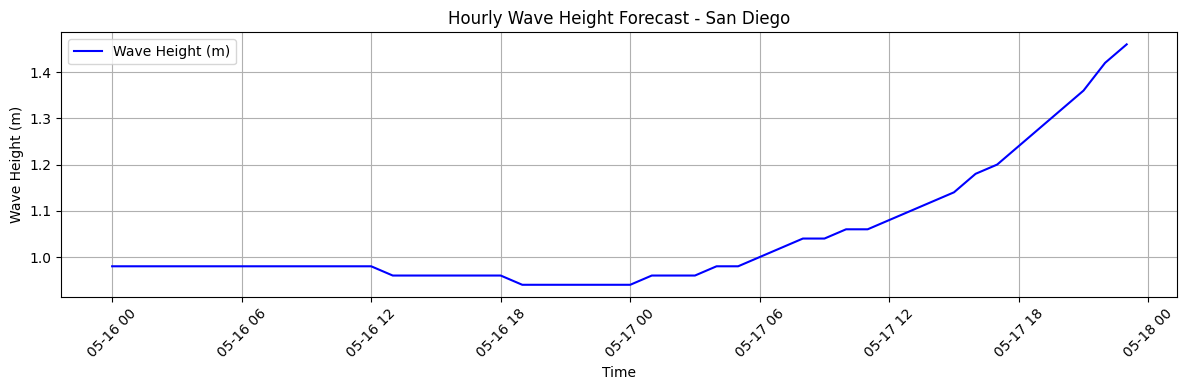

In [17]:
# Cell 5: Plot wave height
plt.figure(figsize=(12, 4))
plt.plot(times, wave_height, label="Wave Height (m)", color='blue')
plt.title("Hourly Wave Height Forecast - San Diego")
plt.xlabel("Time")
plt.ylabel("Wave Height (m)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


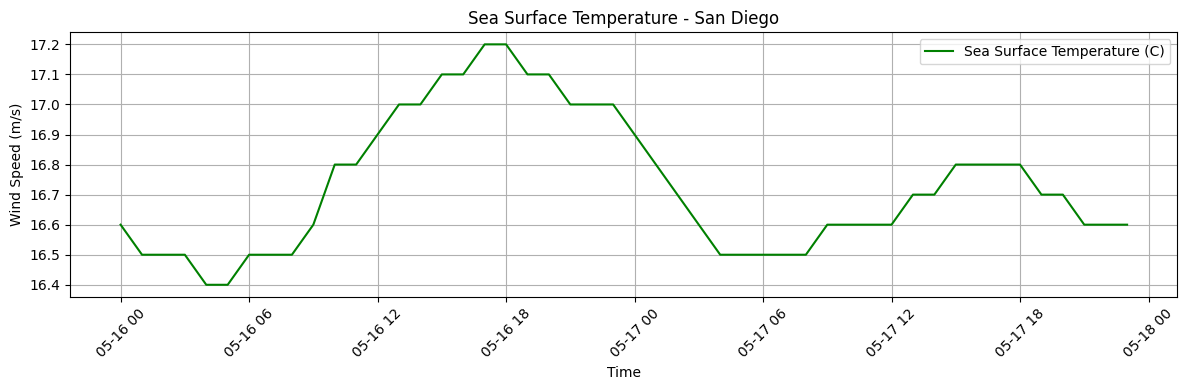

In [ ]:
# Cell 6: Plot Sea Surface Temperature
plt.figure(figsize=(12, 4))
plt.plot(times, sea_surface_temperature, label="Sea Surface Temperature (C)", color='green')
plt.title("Sea Surface Temperature - San Diego")
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
